In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_excel("PAS1.xlsx", sheet_name='RAW')

In [2]:
# Colors and Styles
colors = {'CONTROL': 'orange', 'MED': 'green'} 
time_colors = {'0': 'orange', '4': 'deeppink', '8': 'deepskyblue'}

line_styles_time = {'0': '-', '4': '--', '8': ':'}  

# Define characteristics of the samples
unique_genders = df["Gender"].unique()
unique_diets = df["dietType"].unique()
unique_time_series= df["TimeSeries"].unique()
# Collect info in a list
plots_data = []

# Loop into each combination of gender and diet
for gender in unique_genders:
    for diet in unique_diets:
        # Filter data for Gender and Diet
        df_filtered = df[(df["Gender"] == gender) & (df["dietType"] == diet)]
        # Count the total number of samples for this combination
        total_samples = df_filtered.shape[0]
        
        # Lista per memorizzare i dati delle curve per questo plot
        curves = []
        
        # Loop into the time series
        for time in unique_time_series:
            # Filter for the current time series
            df_time = df_filtered[df_filtered["TimeSeries"] == time]

            if df_time.empty:
                continue
            
            # Drop the unuseful column
            df_time_cleaned = df_time.drop(df_time.columns[[1, 2, 3]], axis=1)
            df_time_cleaned.set_index(df_time_cleaned.columns[0], inplace=True)
            df_transposed = df_time_cleaned.transpose()
            data = df_transposed.to_numpy()

            # Loop into all the columns/rows
            for i in range(data.shape[1]):
                hist, bins = np.histogram(data[:, i], bins=np.logspace(-8, 1, 50), density=True)  # Bins logaritmici
                bins_mid = (bins[1:] + bins[:-1]) / 2

                color = time_colors[str(time)]
                line_style = line_styles_time[str(time)]
                
                # Memorizza i dati della curva
                curves.append({
                    "bins_mid": bins_mid,
                    "hist": hist,
                    "color": color,
                    "line_style": line_style,
                    "label": f"Time: {time}" if i == 0 else ""  # Etichetta solo per la prima curva
                })
        
        # Memorizza i dati del plot
        plots_data.append({
            "title": f"{gender} - {diet}",
            "total_samples": total_samples,
            "curves": curves
        })

c:\Users\spigno\miniconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
c:\Users\spigno\miniconda3\Lib\site-packages\numpy\lib\histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


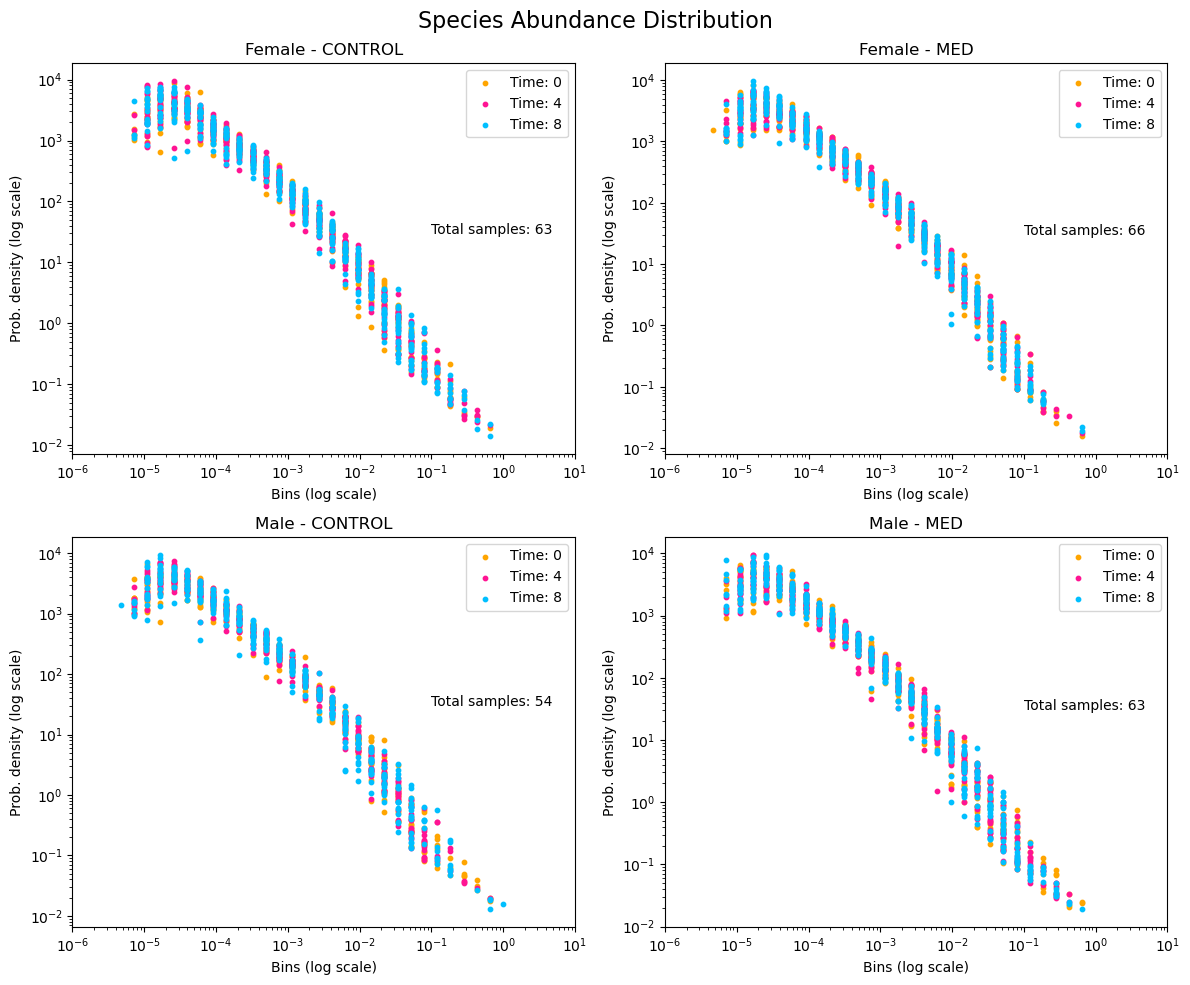

In [5]:
###Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()  # To simplifly the access

# Loop into the collected data
for idx, plot_data in enumerate(plots_data):
    ax = axes[idx]
    ax.set_title(plot_data["title"])
    
    # Plot all the bins
    for curve in plot_data["curves"]:
       ax.scatter(curve["bins_mid"], curve["hist"], color=curve["color"], label=curve["label"], s=10)  # Adjust size (s) as needed
    
    # Adding information on the samples
    ax.text(1e-1, 45, f"Total samples: {plot_data['total_samples']}", fontsize=10, ha='left', va='top', color='black')
    # Adding the axis titles
    ax.set_xlabel("Bins (log scale)")
    ax.set_ylabel("Prob. density (log scale)")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(1e-6, 1e1)
    
    ax.legend()
fig.suptitle('Species Abundance Distribution', fontsize=16)
# Layout and saving 
plt.tight_layout()

plt.savefig("ob1SAD.png", dpi=600)
plt.show()